<a href="https://colab.research.google.com/github/osadose/osadose/blob/main/Predictive_Analysis_of_COVID_19_Case_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-9e5dc77f904a>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_cases_over_time = data.groupby('Date').sum()['Cases'].reset_index()


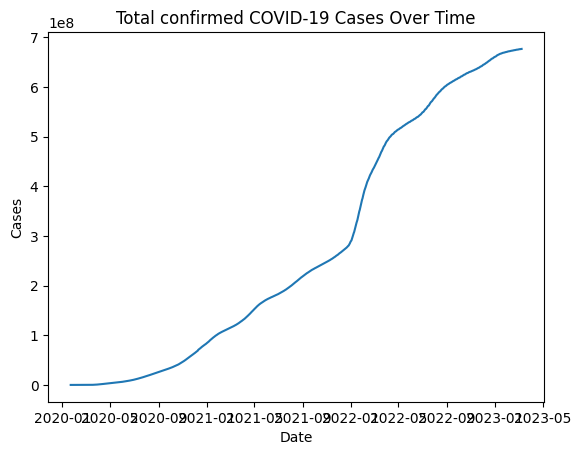

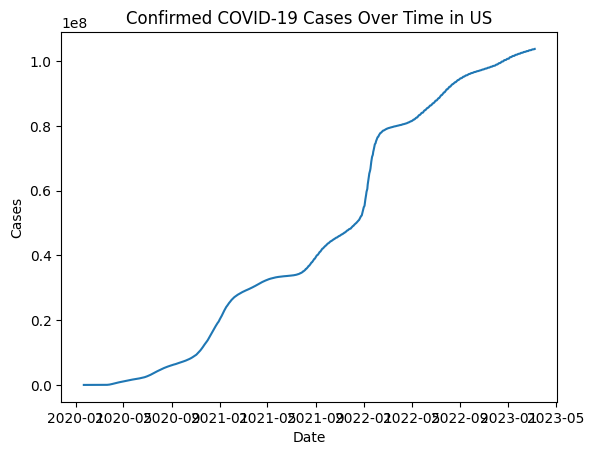

          Actual     Predicted
273654  94051288  8.369671e+07
41298    2047082  1.461404e+06
270186  92922767  8.322067e+07
180885  44371002  4.577247e+07
36096    1666699  7.473491e+05
...          ...           ...
188399  46320009  4.680388e+07
35518    1627392  6.680097e+05
206317  57267794  7.445367e+07
157765  34298786  4.259889e+07
164412  36497053  4.351130e+07

[229 rows x 2 columns]
Mean Absolute Error: 5837160.686259467
Mean Squared Error: 51058759763748.734
Root Mean Squared Error: 7145541.250580584


<ipython-input-6-9e5dc77f904a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Date_num'] = us_data['Date'].dt.strftime('%y%j').astype(int)


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(url)

# Data Cleaning
data = data.drop(['Lat', 'Long'], axis=1)
data = pd.melt(data, id_vars=['Province/State', 'Country/Region'], var_name='Date', value_name='Cases')
data['Date'] = pd.to_datetime(data['Date'])

# Data Visualization: Plotting total cases over time globally
total_cases_over_time = data.groupby('Date').sum()['Cases'].reset_index()
sns.lineplot(x='Date', y='Cases', data=total_cases_over_time)
plt.title('Total confirmed COVID-19 Cases Over Time')
plt.show()

# Focus on a specific country, e.g., US
us_data = data[data['Country/Region']=='US']

# Plotting the trend
sns.lineplot(x='Date', y='Cases', data=us_data)
plt.title('Confirmed COVID-19 Cases Over Time in US')
plt.show()

# Building a Simple Prediction Model: linear regression to predict future cases
# Convert 'Date' to a number that can be used in the model
us_data['Date_num'] = us_data['Date'].dt.strftime('%y%j').astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(us_data[['Date_num']], us_data['Cases'], test_size=0.2, random_state=0)

# Fit a linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Make predictions using the test set
y_pred = regressor.predict(X_test)

# Compare the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

# Evaluate the performance of the algorithm (MAE, MSE, RMSE)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


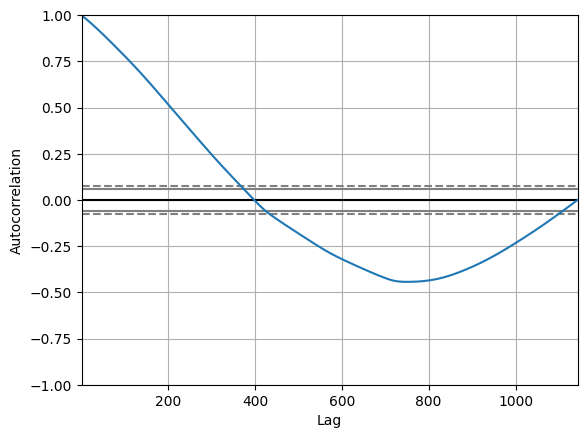

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Cases   No. Observations:                 1143
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14263.093
Date:                Mon, 22 May 2023   AIC                          28538.186
Time:                        19:39:09   BIC                          28568.429
Sample:                             0   HQIC                         28549.606
                               - 1143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5255      0.016     32.791      0.000       0.494       0.557
ar.L2         -0.0060      0.015     -0.410      0.682      -0.035       0.023
ar.L3          0.2249      0.013     17.766      0.0

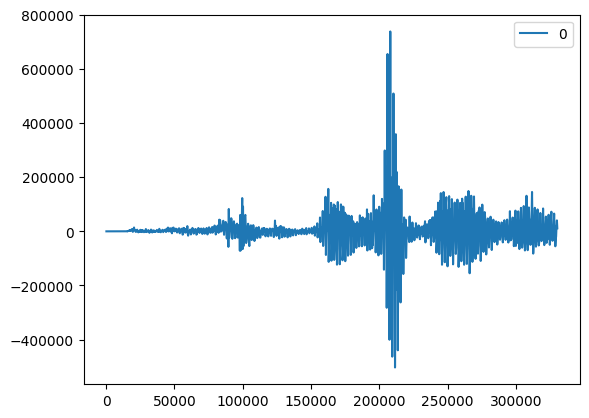

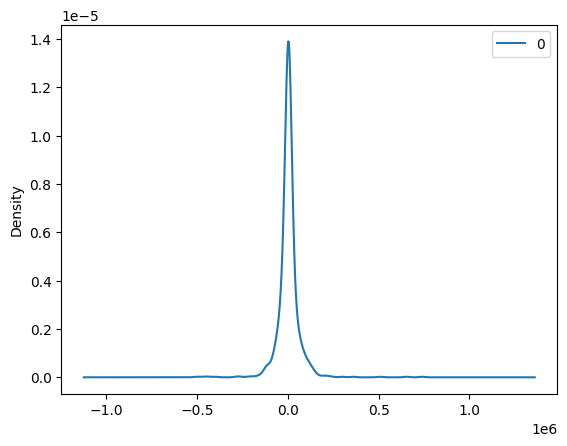

                   0
count    1143.000000
mean     3926.718162
std     64124.173981
min   -503031.075948
25%    -11162.807651
50%      2190.749872
75%     17004.582690
max    738529.693312
1143    1.038354e+08
1144    1.038714e+08
1145    1.039113e+08
1146    1.039514e+08
1147    1.039889e+08
1148    1.040246e+08
1149    1.040603e+08
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [4]:
# Import additional necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation to help determine ARIMA parameters
autocorrelation_plot(us_data['Cases'])
plt.show()

# Fit ARIMA model (adjust p, d, q values based on autocorrelation plot and tests)
model = ARIMA(us_data['Cases'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Plot density of residuals
residuals.plot(kind='kde')
plt.show()

# Print residual description
print(residuals.describe())

# Forecasting
forecast = model_fit.forecast(steps=7) # Forecast the next week
print(forecast)


In [7]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor object
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Compare actual vs predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df.head())


Mean Absolute Error: 65261.59
          Actual     Predicted
273654  94051288  9.390049e+07
41298    2047082  2.032352e+06
270186  92922767  9.285953e+07
180885  44371002  4.427721e+07
36096    1666699  1.660242e+06
